In [ ]:
# Twitter data set

In [2]:
# importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the data set

from google.colab import files
uploaded = files.upload()

Saving twitter_training.csv to twitter_training.csv


In [4]:

# reading the data set
df = pd.read_csv('twitter_training.csv', header=None)


In [5]:
# printing columns in data set
df.columns = ['ID', 'Entity', 'Sentiment', 'Text']
df.head()

,ID,Entity,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
# checking for missing values
df.isnull().sum()

,0
ID,0
Entity,0
Sentiment,0
Text,686


In [7]:
# dropping missing text rows
df.dropna(subset=['Text'], inplace=True)

In [8]:
# checking for sentiments count
df['Sentiment'].value_counts()

,count
Sentiment,
Negative,22358
Positive,20655
Neutral,18108
Irrelevant,12875


<ipython-input-9-a206ecd5744f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette='Set2')


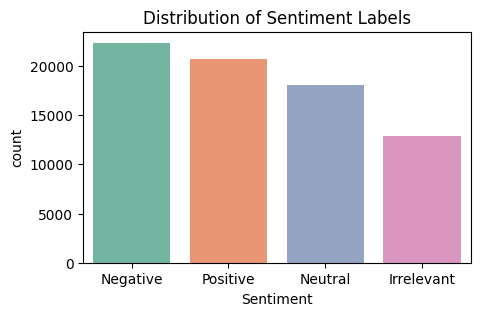

In [9]:
# Distribution Plot

plt.figure(figsize=(5,3))
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette='Set2')
plt.title("Distribution of Sentiment Labels")
plt.show()

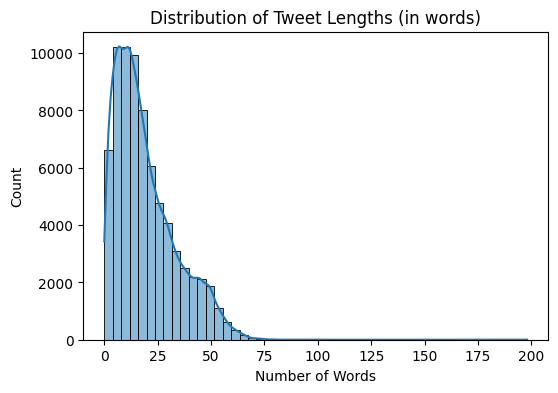

In [10]:
# checking average and distribution of tweet length

df['text_length'] = df['Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(6,4))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribution of Tweet Lengths (in words)")
plt.xlabel("Number of Words")
plt.show()


In [ ]:
'''
Highest count is 10,000 (5-15 words)
plot is right skwewed
'''

In [11]:
# checking avg text per sentiment

df.groupby('Sentiment')['text_length'].mean()

,text_length
Sentiment,
Irrelevant,19.631146
Negative,20.047142
Neutral,20.248454
Positive,17.190462


In [12]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [13]:
# encoding sentiment labels

label_encoder = LabelEncoder()
df['SentimentEncoded'] = label_encoder.fit_transform(df['Sentiment'])

# Tokenize Text
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(df['Text'])

# convert text in sequences
sequences = tokenizer.texts_to_sequences(df['Text'])
padded_sequences = pad_sequences(sequences, padding='post')

In [14]:
# creating train test split

X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    df['SentimentEncoded'].values,
    test_size=0.2,
    random_state=42,
    stratify=df['SentimentEncoded']
)


In [15]:
# Vocabulary size and max sequence length

vocab_size = len(tokenizer.word_index) + 1
max_len = padded_sequences.shape[1]

print("Vocabulary Size:", vocab_size)
print("Max Sequence Length:", max_len)

Vocabulary Size: 33785
Max Sequence Length: 166


In [16]:
# creating Simple RNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

# RNN Model Architecture
rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  # 4 classes: Positive, Negative, Neutral, Irrelevant
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [17]:
# Compile the model
rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [27]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Model Training
rnn_history = rnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
370/370 ━━━━━━━━━━━━━━━━━━━━ 43s 117ms/step - accuracy: 0.2993 - loss: 1.3680 - val_accuracy: 0.3081 - val_loss: 1.3624
Epoch 2/50
370/370 ━━━━━━━━━━━━━━━━━━━━ 84s 122ms/step - accuracy: 0.2995 - loss: 1.3685 - val_accuracy: 0.3081 - val_loss: 1.3624
Epoch 3/50
370/370 ━━━━━━━━━━━━━━━━━━━━ 80s 116ms/step - accuracy: 0.3027 - loss: 1.3659 - val_accuracy: 0.3081 - val_loss: 1.3623
Epoch 4/50
370/370 ━━━━━━━━━━━━━━━━━━━━ 81s 114ms/step - accuracy: 0.2958 - loss: 1.3690 - val_accuracy: 0.3081 - val_loss: 1.3625
Epoch 5/50
370/370 ━━━━━━━━━━━━━━━━━━━━ 83s 118ms/step - accuracy: 0.3030 - loss: 1.3680 - val_accuracy: 0.3081 - val_loss: 1.3624
Epoch 6/50
370/370 ━━━━━━━━━━━━━━━━━━━━ 80s 112ms/step - accuracy: 0.3004 - loss: 1.3682 - val_accuracy: 0.3046 - val_loss: 1.3624
Epoch 7/50
370/370 ━━━━━━━━━━━━━━━━━━━━ 44s 119ms/step - accuracy: 0.3035 - loss: 1.3660 - val_accuracy: 0.3081 - val_loss: 1.3625
Epoch 8/50
370/370 ━━━━━━━━━━━━━━━━━━━━ 80s 114ms/step - accuracy: 0.3017 - loss: 1

In [28]:

# Predict class probabilities
y_pred_probs_rnn = rnn_model.predict(X_test)
y_pred_rnn = np.argmax(y_pred_probs_rnn, axis=1)

463/463 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step


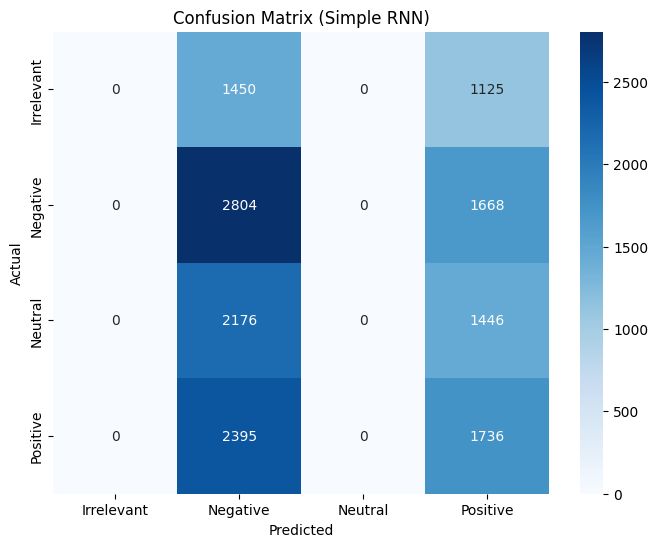

In [29]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rnn), annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap='Blues')
plt.title("Confusion Matrix (Simple RNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

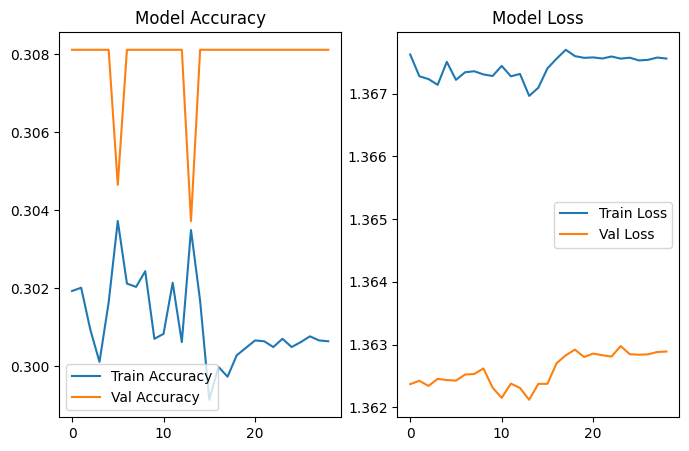

In [30]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'], label='Train Loss')
plt.plot(rnn_history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.show()


In [31]:
# Example new texts to predict
new_texts = [
    "I love this product, it is amazing!",
    "I am not sure how I feel about this."
]

# Preprocess new texts the same way: tokenize and pad
new_sequences = tokenizer.texts_to_sequences(new_texts)
max_len = padded_sequences.shape[1]  # or the length you used in training
new_padded = pad_sequences(new_sequences, maxlen=max_len, padding='post')

# Predict probabilities for each class
pred_probs = rnn_model.predict(new_padded)

# Get predicted class indices (highest probability)
pred_class_indices = pred_probs.argmax(axis=1)

# Decode label indices back to sentiment strings
pred_labels = label_encoder.inverse_transform(pred_class_indices)

# Show results
for text, label in zip(new_texts, pred_labels):
    print(f"Text: {text}\nPredicted Sentiment: {label}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Text: I love this product, it is amazing!
Predicted Sentiment: Positive

Text: I am not sure how I feel about this.
Predicted Sentiment: Positive

